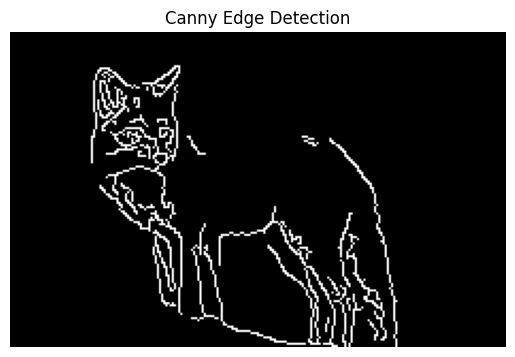

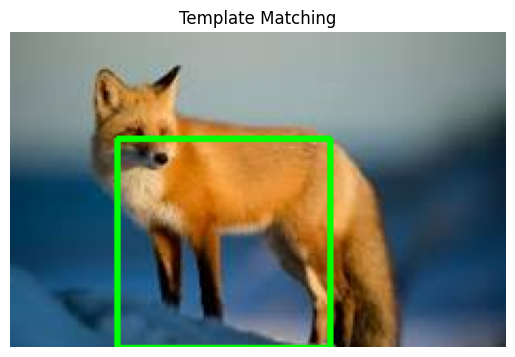

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Canny Edge Detection
img = cv2.imread('/kaggle/input/animal/download.jfif', 0)  # load in grayscale

if img is None:
    print("❌ 'download.jfif' not found. Check file name/case.")
else:
    edges = cv2.Canny(img, 100, 200)

    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

# Template Matching
img_rgb = cv2.imread('/kaggle/input/animal/download.jfif')  # color image

if img_rgb is None:
    print("❌ 'download (1).jfif' not found. Check file name/case.")
else:
    # Safe cropping (use a smaller region if unsure about size)
    template = img_rgb[50:150, 50:150]
    
    if template.size == 0:
        print("❌ Template region is empty. Change the crop dimensions.")
    else:
        res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = max_loc
        h, w = template.shape[:2]
        cv2.rectangle(img_rgb, top_left, (top_left[0]+w, top_left[1]+h), (0,255,0), 2)

        plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
        plt.title("Template Matching")
        plt.axis('off')
        plt.show()